<a href="https://colab.research.google.com/github/biancadsouza-21/computational-statistics/blob/main/CSSL_06_polynomial_regression_bias_variance_tradeoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial regression
Let's try loading a dataset a dataset from Kaggle. To do this, you will need to [create a legacy API key from Kaggle](https://www.kaggle.com/settings). This will download a kaggle.json file.

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"biancadsouza","key":"364478dfc9f40b458263e7f9ba560b2a"}'}

In [2]:
# Change the permissions of the kaggle.json file such that only you can read/write the file.
# This is to prevent someone else from modifying the file.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!pip install -q kaggle # Install that Kaggle package to interact with Kaggle's datasets; pip is python's package manager

In [5]:
!kaggle datasets download -d mirajdeepbhandari/polynomial-regression

Dataset URL: https://www.kaggle.com/datasets/mirajdeepbhandari/polynomial-regression
License(s): CC0-1.0
  0% 0.00/1.18k [00:00<?, ?B/s]
100% 1.18k/1.18k [00:00<00:00, 5.40MB/s]


In [6]:
!unzip polynomial-regression.zip

Archive:  polynomial-regression.zip
  inflating: Ice_cream selling data.csv  


In [7]:
# Import necessary packages
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.metrics import PredictionErrorDisplay

In [8]:
os.listdir() # Look for the files/directories within the current directory

['.config',
 'Ice_cream selling data.csv',
 'kaggle.json',
 'polynomial-regression.zip',
 'sample_data']

The Ice_cream selling data.csv is available!

In [9]:
data = pd.read_csv("Ice_cream selling data.csv") # Read the csv file into a pandas dataframe
type(data)

pandas.core.frame.DataFrame

In [10]:
data.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [11]:
data.shape

(49, 2)

In [12]:
data.info() # Gives basic information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 916.0 bytes


In [13]:
data.describe() # Gives basic statistics about the columns of the dataframe

,Temperature (°C),Ice Cream Sales (units)
count,49.000000,49.000000
mean,0.271755,15.905308
std,2.697672,12.264682
min,-4.662263,0.328626
25%,-2.111870,4.857988
50%,0.688781,12.615181
75%,2.784836,25.142082
max,4.899032,41.842986


In [14]:
data.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [15]:
X = data.iloc[:, :-1] #: implies take all rows, :-1 implies all except last column
y = data.iloc[:, -1]

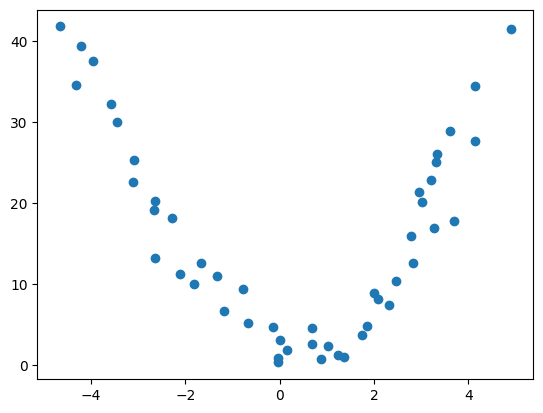

In [19]:
plt.scatter(X,y)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(34, 1) (34,) (15, 1) (15,)


In [47]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
model.score(X_train, y_train)

0.026645247696274632

In [49]:
predict = np.round(model.predict(X_test), decimals = 1)

In [50]:
pd.DataFrame({"Actual Sales": y_test, "Predicted Sales": predict})

,Actual Sales,Predicted Sales
13,10.012868,18.1
45,17.843957,14.0
47,27.698383,13.6
44,28.912188,14.0
17,9.392969,17.3
27,2.313806,15.9
26,0.789974,16.1
25,4.625689,16.2
31,4.857988,15.3
19,4.673643,16.8


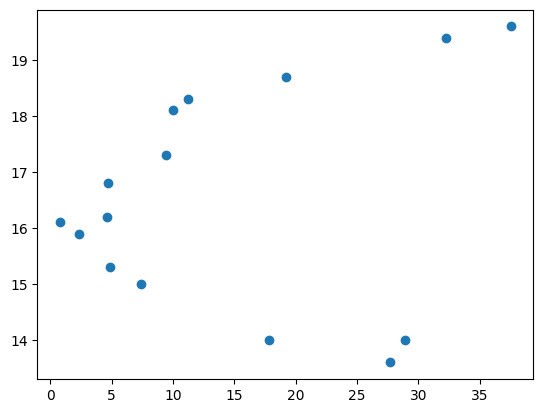

In [51]:
plt.scatter(y_test, predict) #We would want the plot to be a line with slope 1 which is not
#the pattern observed

Transforming the data into polynomial features
This adds a new feature column for X^2

In [279]:
poly = PolynomialFeatures(degree = 10)
X_poly = poly.fit_transform(X)

In [280]:
print(X_poly[0], X_poly[0, 1]**2, X_poly[0, 1]**3) #to check whether computed values are the same

[ 1.00000000e+00 -4.66226268e+00  2.17366933e+01 -1.01342174e+02
  4.72483834e+02 -2.20284375e+03  1.02702362e+04 -4.78825388e+04
  2.23240974e+05 -1.04080806e+06  4.85252057e+06] 21.73669327140054 -101.34217376543437


In [281]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

In [282]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [283]:
predict_train = np.round(model.predict(X_train), decimals=2)
predict_test = np.round(model.predict(X_test), decimals=2)

In [284]:
pd.DataFrame({"Actual Sales": y_test, "Predicted Sales": predict_test})

,Actual Sales,Predicted Sales
13,10.012868,12.63
45,17.843957,30.19
47,27.698383,34.42
44,28.912188,28.80
17,9.392969,6.28
27,2.313806,1.33
26,0.789974,0.89
25,4.625689,0.55
31,4.857988,5.69
19,4.673643,2.26


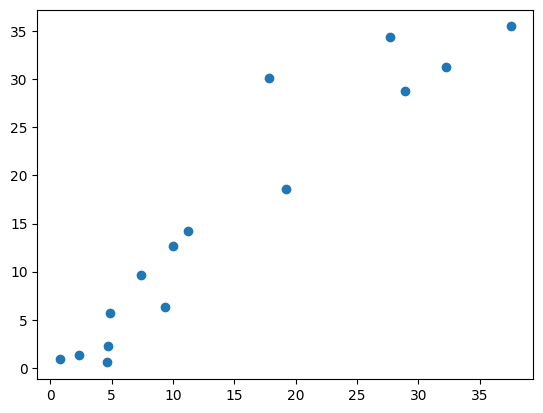

In [285]:
plt.scatter(y_test, predict_test) #better predictions across

In [286]:
r2_score(y_test, predict_test) # r2 highest at order 3

0.870799317104498

In [287]:
train_error = mean_squared_error(y_train, predict_train)
test_error = mean_squared_error(y_test, predict_test)
print(f"The train error is {train_error} \nThe test error is {test_error}")


The train error is 4.4906592704256365 
The test error is 17.16788982316606


In [288]:
flexibility = (1,2,3,4,5,6,7,8,9,10)
train_mse = (148.5740843054488, 9.136810624012597, 8.206423654489251, 6.133365357901422, 5.05967476054717, 4.934685483631732, 4.8337746915040185, 4.835083016934872, 4.792923244062188, 4.4906592704256365)
test_mse = (131.0968233778374, 13.366518573495155, 13.127187834747936, 14.81318132109119, 18.765288559749475, 18.868476410110265, 16.98576127680813, 17.0306600325449, 16.689696119349687, 17.16788982316606)

Text(0.5, 1.0, 'Traning vs Test MSE with Change in Model Flexibility')

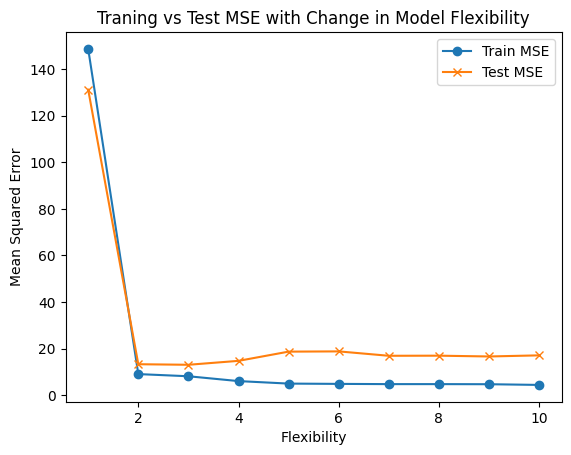

In [295]:
fig,ax = plt.subplots()
ax.plot(flexibility, train_mse, marker = 'o', label = "Train MSE")
ax.plot(flexibility, test_mse, marker = 'x', label = "Test MSE")
ax.legend()
ax.set_xlabel("Flexibility")
ax.set_ylabel("Mean Squared Error")
ax.set_title("Traning vs Test MSE with Change in Model Flexibility")


In [ ]:
degrees = range(1,10)
train_error = []
test_error = []
for degree in degrees:
  if degree()